In [104]:
import pandas as pd
import pandas_datareader as pdr # 'pdr.data' para acessar o módulo 'data' dentro do pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [105]:
# Lista de tickers
tickers = ['PMAM3.SA']#, 'IRDM11.SA', 'HGLG11.SA', 'VGHF11.SA', 'XPCA11.SA']
# Dicionário para armazenar os dados
dados = {}
# Obtendo os dados de cada ação e armazenando no dicionário
for t in tickers:
    ticker_data = yf.download(t, start='2023-07-01')['Adj Close']
    dados[t] = ticker_data

# Criando um DataFrame com os dados
dados_df = pd.DataFrame(dados)

# Imprimindo o DataFrame
print(dados_df)


[*********************100%***********************]  1 of 1 completed
            PMAM3.SA
Date                
2023-07-03      4.67
2023-07-04      4.75
2023-07-05      4.73
2023-07-06      4.66
2023-07-07      4.65
2023-07-10      5.03
2023-07-11      5.13
2023-07-12      5.18
2023-07-13      5.75
2023-07-14      5.81
2023-07-17      5.65
2023-07-18      5.62
2023-07-19      5.55
2023-07-20      5.62
2023-07-21      5.45
2023-07-24      5.53
2023-07-25      5.74
2023-07-26      5.86


In [106]:
display(dados_df.round(2))


,PMAM3.SA
Date,
2023-07-03,4.67
2023-07-04,4.75
2023-07-05,4.73
2023-07-06,4.66
2023-07-07,4.65
2023-07-10,5.03
2023-07-11,5.13
2023-07-12,5.18
2023-07-13,5.75


In [107]:
dados_df.isnull().sum()

PMAM3.SA    0
dtype: int64

NORMALIZAR

In [108]:
dados_df.iloc[0]

PMAM3.SA    4.67
Name: 2023-07-03 00:00:00, dtype: float64

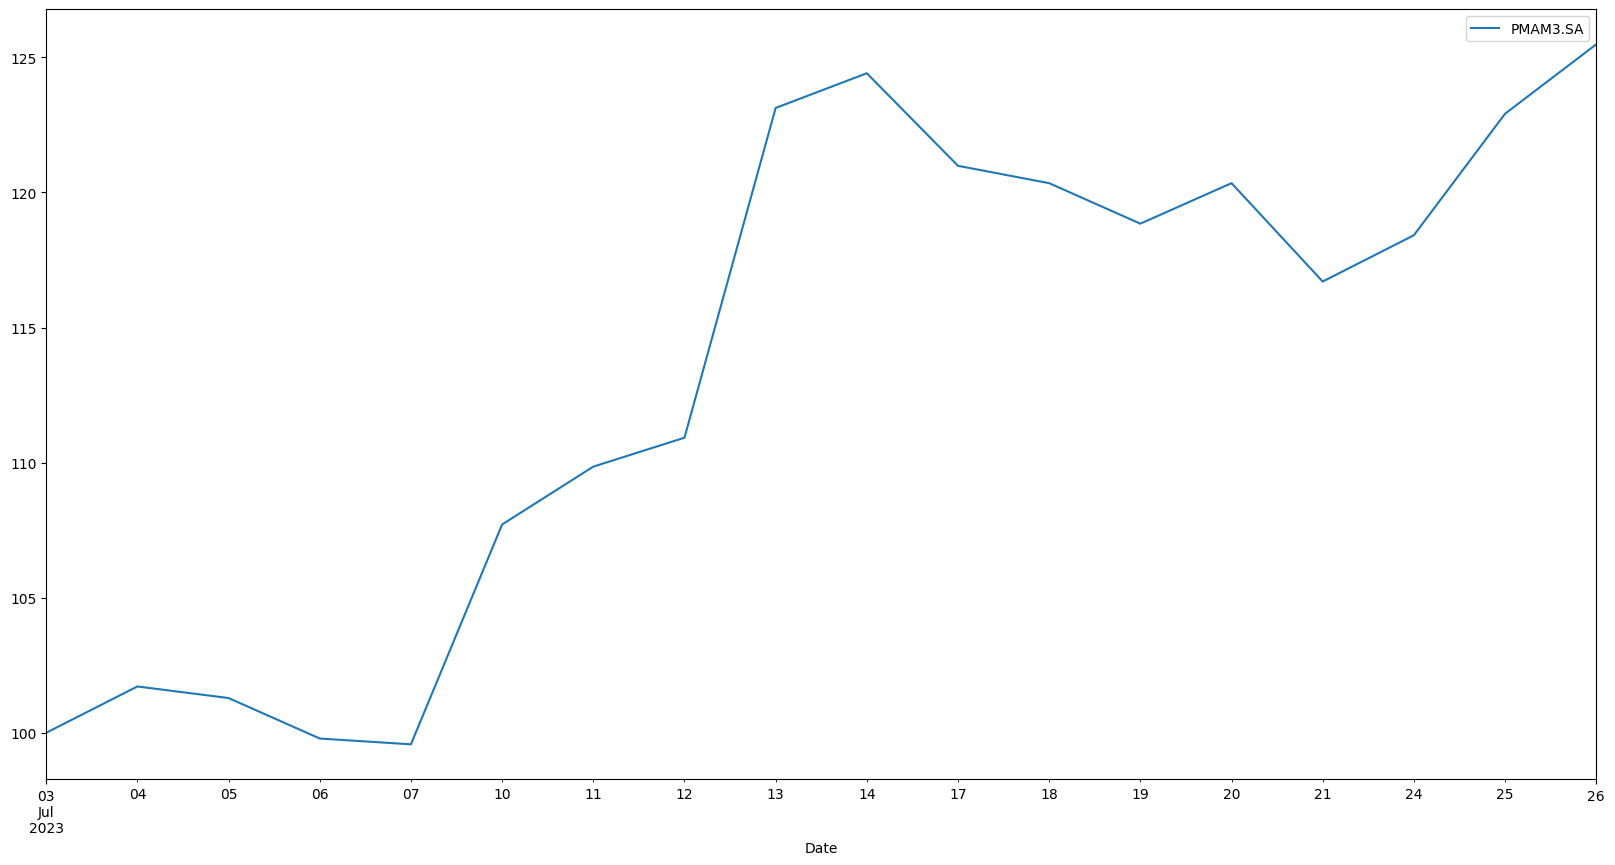

In [109]:
(dados_df/dados_df.iloc[0]*100).plot(figsize=(20,10))
plt.show()

AÇÕES DA PARANAPANEMA TEM UM BELA ALTA NESTE MÊS 07 DE 2023

CALCULO DE RETORNO DA CARTEIRA

In [110]:
retorno=(dados_df/dados_df.shift(1)) -1
display(retorno)

,PMAM3.SA
Date,
2023-07-03,NaN
2023-07-04,0.017131
2023-07-05,-0.004211
2023-07-06,-0.014799
2023-07-07,-0.002146
2023-07-10,0.081720
2023-07-11,0.019881
2023-07-12,0.009747
2023-07-13,0.110039


In [111]:
pesos= np.array([.100])

In [112]:
retorno_a= retorno.mean()*250
retorno_a

PMAM3.SA    3.506106
dtype: float64

In [113]:
np.dot(retorno_a,pesos)


0.3506105662266697

In [114]:
portfolio=(str(round(np.dot(retorno_a,pesos),5)*100)+ '%')
portfolio

'35.061%'